In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df = pd.read_csv("../input/zomato-restaurants-data/zomato.csv", encoding = "ISO-8859-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


 1. Построить линейную модель (линейная регрессия, логистическая регрессия, SVM), настроить её гиперпараметры, сделать выводы.

# Linear regression

Целевая переменная - 'Aggregate rating'. Цель: спрогнозировать рейтинг ресторанов на основе имеющихся признаков.

In [4]:
df_num = df.drop(["Cuisines", "Restaurant Name", "Address", "Locality", "Locality Verbose", "Rating color", "City", "Currency",  "Restaurant ID"], axis = 1)#"Latitude", "Longitude",
df_num["Has Table booking"] = df_num["Has Table booking"].map({"Yes":1,"No":0})
df_num["Has Online delivery"] = df_num["Has Online delivery"].map({"Yes":1,"No":0})
df_num["Is delivering now"] = df_num["Is delivering now"].map({"Yes":1,"No":0})
df_num["Switch to order menu"] = df_num["Switch to order menu"].map({"Yes":1,"No":0})
df_num["Rating text"] = df_num["Rating text"].map({"Excellent":5, "Very Good":4 ,"Good":3, "Average":2, "Poor":1, "Not rated":0})
df_num.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,5,314
1,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,5,591
2,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,4,270
3,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,5,365
4,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,5,229


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


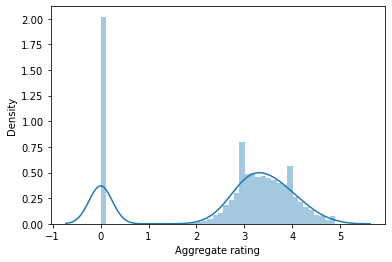

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df_num['Aggregate rating'] )
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


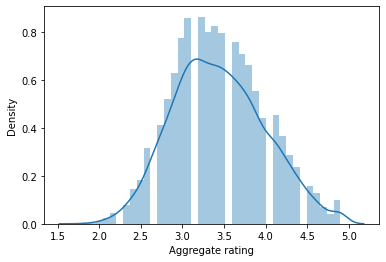

In [6]:
df_num.drop(df_num[(df_num['Aggregate rating']==0)].index, inplace=True)
sns.distplot(df_num['Aggregate rating'] )
plt.show()

In [7]:
# Импорт нужной функции
from sklearn.model_selection import train_test_split

# Создание X, y
# X --- вся таблица без таргета
# y --- таргет (целевая переменная)
y = df_num['Aggregate rating'] 
X = df_num.drop('Aggregate rating', axis=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X = scaler.fit_transform(X)
# Разделение
# test_size --- доля исходных данных, которую оставляем для валидации
# random_state --- произвольное целое число, для воспроизводимости случайных результатов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_valid = scaler.transform(X_valid)

StandardScaler()

Обучим линейной регрессии.

*Простейшей формой регрессии является линейная регрессия, которая предполагает, что предикторы имеют линейную связь с целевой переменной. Предполагается, что входные переменные имеют гауссово распределение. Другое предположение состоит в том, что предикторы не сильно коррелированы друг с другом (проблема, называемая мультиколлинеарностью).*

Уравнение линейной регрессии можно выразить в следующей форме:

y =  a1x1 + a2x2 + a3x3 + ..... + anxn + b

Если верно следующее:

*y - целевая переменная.*

*x1, x2, x3, ... xn - характеристики.*

*a1, a2, a3, ..., an - коэффициенты.*

*b - параметр модели.*

*Параметры модели a и b выбираются методом наименьших квадратов (OLS). Он работает путем минимизации суммы квадратов остатков (фактическое значение - прогнозируемое значение).*

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_valid)

In [9]:
# Вычислим различные метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 0.04362272803252492
MAE: 0.17022652910362987
MedAE: 0.14772940322695494
R2: 0.862066547708747


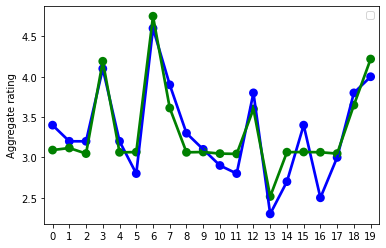

In [10]:
# Визуализируем отклонение результатов нашей модели от истинных
g = sns.pointplot(x=y_valid.index[:20], y=y_valid[:20], color='blue', label='True')
g = sns.pointplot(x=y_valid.index[:20], y=y_pred[:20], color='green', label='Prediction')
g.set_xticklabels(np.arange(20))
plt.legend()
plt.show()

**Ridge regression** - это расширение линейной регрессии, где функция потерь модифицируется, чтобы минимизировать сложность модели. Эта модификация выполняется путем добавления параметра штрафа, который эквивалентен квадрату величины коэффициентов.

Loss function = OLS + alpha * summation (squared coefficient values)

**alpha** , по умолчанию = 1.0
Сила регуляризации; должно быть положительным числом с плавающей запятой. Регуляризация улучшает обусловленность проблемы и снижает разброс оценок. Большие значения указывают на более сильную регуляризацию.

In [11]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge() # по умолчанию alpha=1
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_valid)

print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 0.04362477831193035
MAE: 0.17022279843308655
MedAE: 0.14776092427351406
R2: 0.8620600648011136


Значения R-квадрат варьируются от 0 до 1 и обычно выражаются в процентах. Это статистическая мера, которая представляет собой долю дисперсии целевой переменной, которая объясняется независимыми переменными. 

In [12]:
# подбор alpha
from sklearn.model_selection import GridSearchCV

alpha_grid = {'alpha': np.logspace(-1, 1, 20)} # 20 точек от 10^(-4) до 10^4
ridge_grid = GridSearchCV(ridge, alpha_grid, cv=5, scoring='r2', n_jobs=-1) 
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])},
             scoring='r2')

In [13]:
b_alpha = ridge_grid.best_params_['alpha']
print('Best alpha:', b_alpha)
print('\nBest score:', ridge_grid.best_score_)

Best alpha: 10.0

Best score: 0.8550321711624751


In [14]:
ridge_best = ridge_grid.best_estimator_
y_pred = ridge_best.predict(X_valid)
print('R2:', r2_score(y_valid, y_pred))
print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

R2: 0.8619963356867562
MSE: 0.043644933232851894
MAE: 0.17019544468241934
MedAE: 0.14807234618155718
R2: 0.8619963356867562


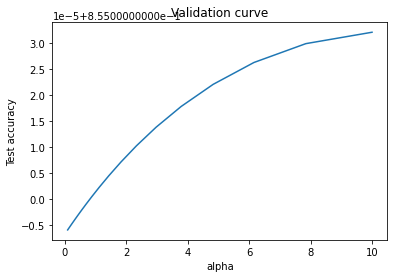

In [15]:
# Валидационная кривая
# По оси х --- значения гиперпараметров (param_alpha)
# По оси y --- значения метрики (mean_test_score)

import matplotlib.pyplot as plt
results_df = pd.DataFrame(ridge_grid.cv_results_)
plt.plot(results_df['param_alpha'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('alpha')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

**Lasso regression**
также является модификацией линейной регрессии. В Лассо функция потерь модифицируется, чтобы минимизировать сложность модели, ограничивая сумму абсолютных значений коэффициентов модели (также называемую l1-нормой).

Функция потерь для регрессии лассо может быть выражена следующим образом:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

В приведенной выше функции потерь альфа - это параметр штрафа, который нам нужно выбрать. Использование ограничения нормы l1 заставляет некоторые значения веса обнуляться, чтобы другие коэффициенты могли принимать ненулевые значения.

In [16]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso() # по умолчанию alpha=1
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_valid)

print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 0.22091354670181648
MAE: 0.3725433800122515
MedAE: 0.30036980895425947
R2: 0.30147953764452384


In [17]:
eps = 1e-6
lasso_coef = lasso.coef_
print('Нулевых коэффициентов:', sum(np.abs(lasso_coef) < eps))
print('Всего коэффициентов:', lasso_coef.shape[0])

Нулевых коэффициентов: 8
Всего коэффициентов: 11


In [18]:
# Lasso с подбором alpha
alpha_grid = {'alpha': np.logspace(-3, 3, 10)} # 10 точек от 10^(-3) до 10^3
lasso_grid = GridSearchCV(lasso, alpha_grid, cv=5, scoring='r2', n_jobs=-1) 
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='r2')

In [19]:
print('Best alpha:', lasso_grid.best_params_)
print('\nBest score:', lasso_grid.best_score_)
#Малое значение alpha говорит о том, что мы совсем немного скорректировали предыдущую модель. Однако посмотрим на R2.

Best alpha: {'alpha': 0.001}

Best score: 0.855135914630799


In [20]:
lasso_best = lasso_grid.best_estimator_
y_pred = lasso_best.predict(X_valid)
print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 0.04362940418762704
MAE: 0.17014559128284001
MedAE: 0.14797836007349785
R2: 0.8620454379532869


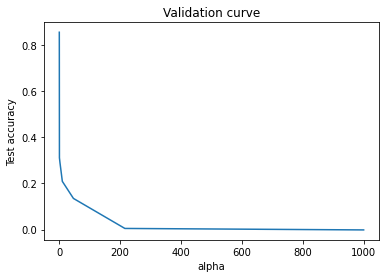

In [21]:
# Валидационная кривая
# По оси х --- значения гиперпараметров (param_alpha)
# По оси y --- значения метрики (mean_test_score)

results_df = pd.DataFrame(lasso_grid.cv_results_)
plt.plot(results_df['param_alpha'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('alpha')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [22]:
eps = 1e-6
lasso_coef = lasso_best.coef_
print('Нулевых коэффициентов:', sum(np.abs(lasso_coef) < eps))
print('Всего коэффициентов:', lasso_coef.shape[0])

Нулевых коэффициентов: 5
Всего коэффициентов: 11


[www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net](http://)


[scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html](http://)

**ElasticNet** сочетает в себе свойства регрессии Ridge и Lasso. Он работает, наказывая модель использованием как l2-нормы, так и l1-нормы.

In [23]:
# ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet() # alpha=1 l1_ratio=0.5
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_valid)

print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 0.21374380840339133
MAE: 0.3668806701812067
MedAE: 0.29461473110707814
R2: 0.32414998491204094


In [24]:
grid = {'alpha': np.logspace(-2, 2, 20), "l1_ratio": np.linspace(0, 1, 100)} 
net_grid = GridSearchCV(elastic_net, grid, cv=5, scoring='r2', n_jobs=-1) 
net_grid.fit(X_train, y_train);

In [25]:
elastic_net_best = net_grid.best_estimator_
y_pred = elastic_net_best.predict(X_valid)
print('Best alpha:', net_grid.best_params_)
print('\nBest score:', net_grid.best_score_)

Best alpha: {'alpha': 0.01, 'l1_ratio': 0.07070707070707072}

Best score: 0.8549211816679716


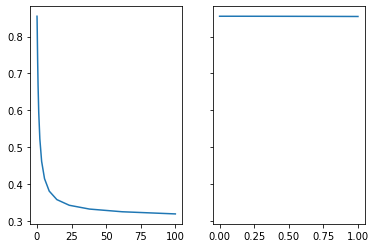

In [26]:
# По оси х --- значения гиперпараметров 
# По оси y --- значения метрики 

results_df = pd.DataFrame(net_grid.cv_results_)
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(grid['alpha'], results_df.groupby('param_alpha')['mean_test_score'].max())
ax[1].plot(grid['l1_ratio'], results_df.groupby('param_l1_ratio')['mean_test_score'].max())
plt.show()

# Neural nets

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

np.random.seed(1)

[scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html](http://)

Multi-layer Perceptron regressor.
Эта модель оптимизирует квадрат ошибки с помощью LBFGS или стохастического градиентного спуска.

solver {'lbfgs', 'sgd', 'adam'}, по умолчанию = 'adam'
Решатель для оптимизации веса.
* lbfgs - оптимизатор из семейства квазиньютоновских методов.
* «sgd» относится к стохастическому градиентному спуску.
* «adam» относится к оптимизатору на основе стохастического градиента, предложенному Кингмой, Дидериком и Джимми Ба.

Примечание. Решатель по умолчанию adam довольно хорошо работает с относительно большими наборами данных (с тысячами обучающих выборок и более) с точки зрения как времени обучения, так и оценки валидации. Однако для небольших наборов данных lbfgs может сходиться быстрее и работать лучше.

In [28]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)

In [29]:
print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 186.0719294839258
MAE: 2.485384068521038
MedAE: 1.29795017643738
R2: -587.352557618046


hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
I-й элемент представляет количество нейронов в i-м скрытом слое.

In [30]:
mlp2 = MLPRegressor(hidden_layer_sizes=(200,), solver="adam", max_iter=400, alpha=0.1)
mlp2.fit(X_train, y_train)
y_pred = mlp2.predict(X_valid)
print('R2:', r2_score(y_valid, y_pred))

R2: -41.493282076355456


In [31]:
mlp2.n_iter_

76

In [32]:
mlp4 = MLPRegressor(solver='adam', hidden_layer_sizes=(100,50), max_iter=400, alpha=0.0004)
mlp4.fit(X_train, y_train)
y_pred = mlp4.predict(X_valid)

In [33]:
print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 147.87715790785248
MAE: 1.6127706271435962
MedAE: 0.7304433484366313
R2: -466.58210284420517


In [34]:
mlp4.n_iter_

33

подбор параметров 

In [35]:
np.logspace(-2, 2, 10)

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [36]:
mlp = MLPRegressor(max_iter=100, solver='adam')
hidden = hidden = [(100,), (100, 50), (100, 50, 20), (50, 50), (50, 50, 50), (50, 30, 30, 20)]
param_grid  = {'hidden_layer_sizes': hidden, "alpha": np.logspace(-2, 2, 10)}
mlp_grid = GridSearchCV(mlp, param_grid , cv=5, scoring='r2', n_jobs=-1) 
mlp_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'hidden_layer_sizes': [(100,), (100, 50),
                                                (100, 50, 20), (50, 50),
                                                (50, 50, 50),
                                                (50, 30, 30, 20)]},
             scoring='r2')

In [37]:
mlp_best = mlp_grid.best_estimator_
y_pred = mlp_best.predict(X_valid)

print("Best params:", mlp_best)
print('R2:', r2_score(y_valid, y_pred))


Best params: MLPRegressor(alpha=4.6415888336127775, hidden_layer_sizes=(50, 30, 30, 20),
             max_iter=100)
R2: -430.1344717472535


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


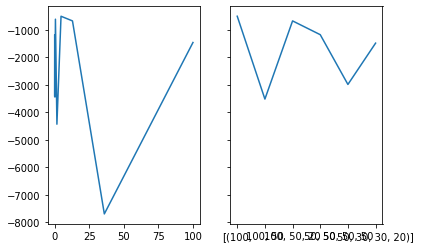

In [38]:
results_df = pd.DataFrame(mlp_grid.cv_results_)
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(param_grid['alpha'], results_df.groupby('param_alpha')['mean_test_score'].max())
hid = (str(hidden)).split(sep=") (")
ax[1].plot(str((np.array(hidden))).split(sep=") ("), results_df.groupby('param_hidden_layer_sizes')['mean_test_score'].max())
plt.show()